In [1]:
import pandas as pd

In [2]:
#I downloaded a dataset with 10 000 images of airplanes, it came with files of metadata that I combined.

df_1 = pd.read_csv("images_family_train.csv", dtype=object)
df_2 = pd.read_csv("images_family_test.csv", dtype=object)
df_3 = pd.read_csv("images_family_val.csv", dtype=object)

In [3]:
frames = [df_1, df_2, df_3]

In [4]:
pd.concat(frames).to_csv("images_family_combined.csv", index=False)
df = pd.read_csv("images_family_combined.csv", dtype=object)

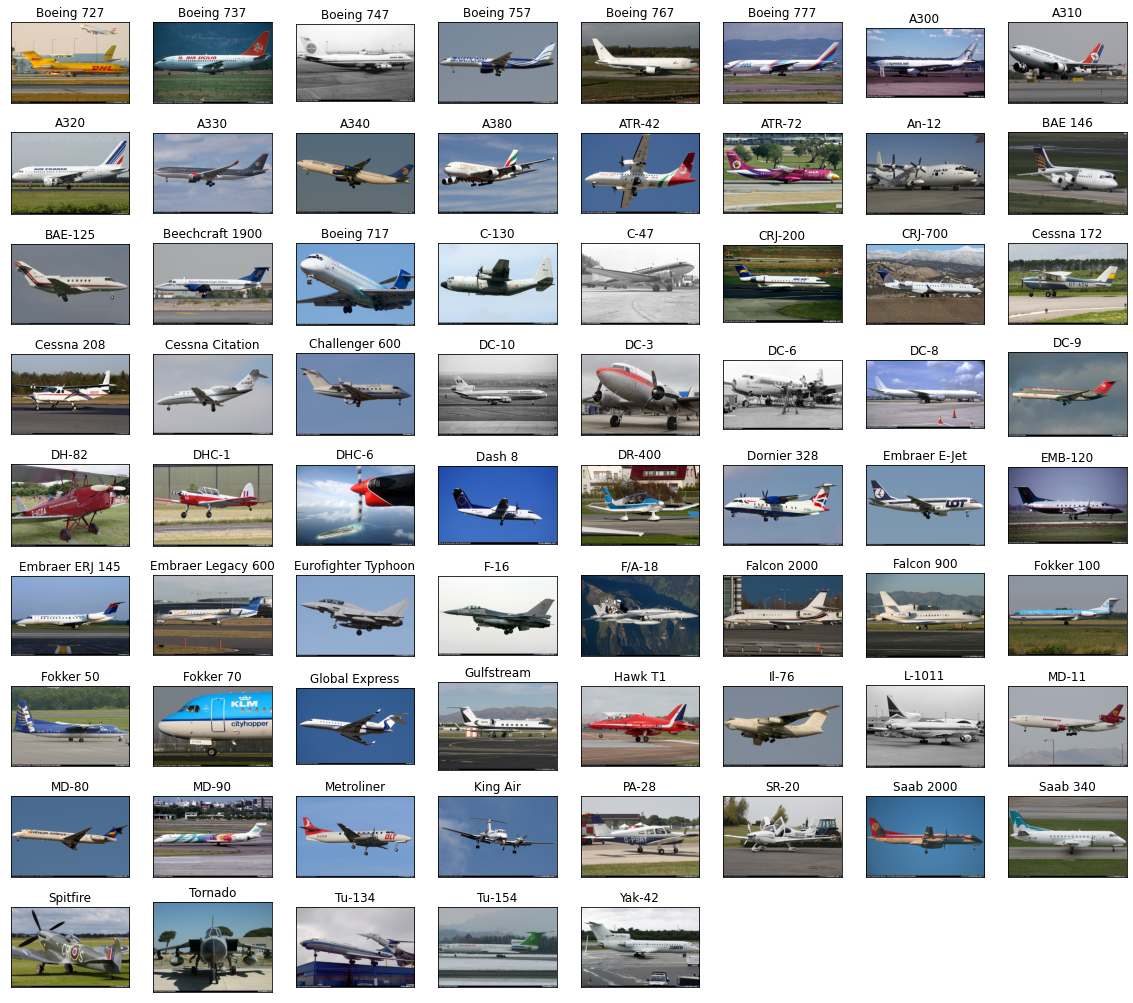

In [10]:
# Let's see a photo of every model of an aircraft in the dataset

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
columns = 8
rows = 10
for i in range(1, len(df.drop_duplicates('model').reset_index().value)):
    img = plt.imread("images/" + str(df.drop_duplicates('model').reset_index().value[i]) + ".jpg")
    fig.add_subplot(rows, columns, i)
    plt.title(df.drop_duplicates('model').reset_index().model[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.show()

In [ ]:
import shutil
import os
import glob

In [28]:
# I am choosing the fighter jets to be recognized by my model
for i in range(0, len(df.loc[df['model'].isin(["Eurofighter Typhoon", "F-16", "F/A-18", "Tornado"])].value)):
    shutil.copy("images/" + str(df.loc[df['model'].isin(["Eurofighter Typhoon", "F-16", "F/A-18", "Tornado"])].value.reset_index().value[i]) + ".jpg", "jets")

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
cd yolov5
!python detect.py --weights best.pt --img 640 --conf 0.25 --source simulation.mp4

I also created a simple flight simulator with Unity. We are entering an era where games can be near photorealistic and I am trying to test my real world data trained model in a virtual environment where it would be possible to obtain unlimited data without data augmentation.

Unity3D is a commercial Real-Time game engine, which means that the physics of the engine does not correspond perfectly to the real world physics. For example it does not account aerodynamics by itself, which would be an essential feature in industrial grade simulation. However our objective is just to record a video to be tested the model with.

I created a plane with pitch, yaw and roll controls and a dynamic camera that chases and watches this plane.


In [ ]:
import cv2
import numpy as np
import pyautogui
import pygetwindow as gw
import sys

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*"XVID")
fps = 60.0
record_seconds = 30

In [ ]:
# Selecting the specific window to record

w = gw.getWindowsWithTitle("simulation")[0]

w.activate()

In [ ]:
# Recording the video and saving it as .avi format

out = cv2.VideoWriter("simulation.avi", fourcc, fps, tuple(w.size))

for i in range(int(record_seconds * fps)):
    
    img = pyautogui.screenshot(region=(w.left, w.top, w.width, w.height))
    frame = np.array(img)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    out.write(frame)
    cv2.imshow("screenshot", frame)

cv2.destroyAllWindows()
out.release()

In [ ]:
!python detect.py --weights best.pt --img 640 --conf 0.25 --source simulation.mp4

Model recognized the fighter jet in the scenery, but often could not distinguish environment from the plane, which were bothscolored blue-grayish. Data labeling is labor-intensive process and the data mainly consisted pictures taken from one specific angle. However with high quality 3d models of objects, simple domain and realistic scenery, there would be a lot of potential training machine learning models in an virtual environment.